# Miscellaneous pure vapour-liquid equilibrium properties

In [1]:
using Clapeyron, PyCall
import PyPlot; const plt = PyPlot

PyPlot

In this notebook, we give additional examples of pure component vapour-liquid equilibrium properties users can obtain in `Clapeyron.jl`. Many examples have been given in other notebooks; as such, we focus on those functionalities not illustrated elsewhere.

## Critical points of the alkane series

A simple example to start with, primarily to illustrate how robust the critical point solver is. The only case where it is of any use is in the SAFT-type equations as, for most other equations of state, the critical point is an input parameter.

First generating the models:

In [2]:
alkanes = [["methane"],["ethane"],["propane"],["butane"],["pentane"],["hexane"],["heptane"],["octane"],["nonane"],["decane"]]

model1 = GERG2008.(alkanes)
model2 = SAFTgammaMie.(alkanes)
model3 = PCSAFT.(alkanes)
model4 = SAFTVRMie.(alkanes)
model5 = CKSAFT.(alkanes)
model6 = BACKSAFT.(alkanes)

models = [model1,model2,model3,model4,model5,model6];

Obtaining the critical point for each species using each equation of state:

In [3]:
Tc = zeros(length(alkanes),length(models))
pc = zeros(length(alkanes),length(models))

for i ∈ 1:length(models)
    crit = crit_pure.(models[i])
    Tc[:,i] = [crit[i][1] for i ∈ 1:10]
    pc[:,i] = [crit[i][2] for i ∈ 1:10]
end

Plotting:

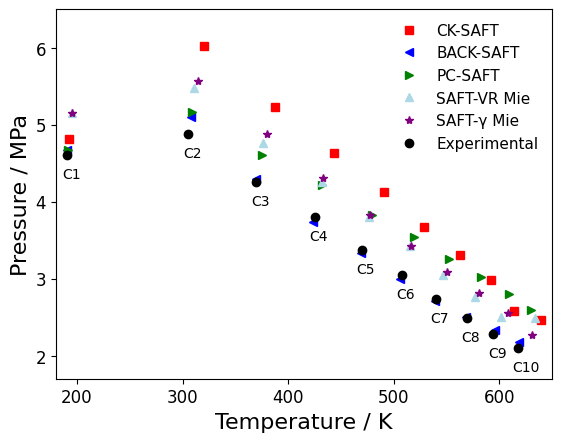

In [4]:
plt.clf()
plt.plot(Tc[:,5],pc[:,5]./1e6,linestyle="",marker="s",color="r",label="CK-SAFT")
plt.plot(Tc[:,6],pc[:,6]./1e6,linestyle="",marker="<",color="b",label="BACK-SAFT")
plt.plot(Tc[:,3],pc[:,3]./1e6,linestyle="",marker=">",color="g",label="PC-SAFT")
plt.plot(Tc[:,4],pc[:,4]./1e6,linestyle="",marker="^",color="lightblue",label="SAFT-VR Mie")
plt.plot(Tc[:,2],pc[:,2]./1e6,linestyle="",marker="*",color="purple",label="SAFT-γ Mie")

plt.plot(Tc[:,1],pc[:,1]./1e6,linestyle="",marker="o",color="k",label="Experimental") 
label = ["C1","C2","C3","C4","C5","C6","C7","C8","C9","C10"]
for i ∈ 1:10
    plt.text(Tc[i,1].-5, pc[i,1]./1e6 .-0.3,label[i])
end
plt.legend(loc="upper right",frameon=false,fontsize=11) 
#
plt.xlabel("Temperature / K",fontsize=16)
plt.ylabel("Pressure / MPa",fontsize=16)
plt.xlim([180,650])
plt.ylim([1.7,6.5])
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
display(plt.gcf())

As expected, the SAFT-type equations over-estimate the critical point where SAFT-VR Mie and SAFT-γ Mie generally over-estimate it the least. BACK-SAFT is the only exception where it predicts almost exact critical points.

## Enthalpy of vapourisation of water

The only remaining property to illustrate is the enthalpy of vapourisation. Here we use the example of water.

Generating the models:

In [5]:
model1 = GERG2008(["water"])
model2 = vdW(["water"])
model3 = PR(["water"])
model4 = PCSAFT(["water"])
model5 = SAFTVRMie(["water"])

models = [model1,model2,model3,model4,model5];

Calculating the critical point for each model:

In [6]:
crit = crit_pure.(models);

Obtaining the enthalpy of vapourisation for each model:

In [7]:
T = zeros(200,5)
Hvap = zeros(200,5)
for i ∈ 1:5
    T[:,i] = range(400,crit[i][1],length=200)
    Hvap[:,i] = enthalpy_vap.(models[i],T[:,i])
end

Collecting some data from the NIST Chemistry Webbook:

In [8]:
T_exp = [400,420,440,460,480,500,520,540,560,580,600,620,640]

H_exp = [39.3274,38.264,37.115,35.865,34.492,32.972,31.275,29.359,27.163,24.59,21.465,17.39,10.734];

Plotting:

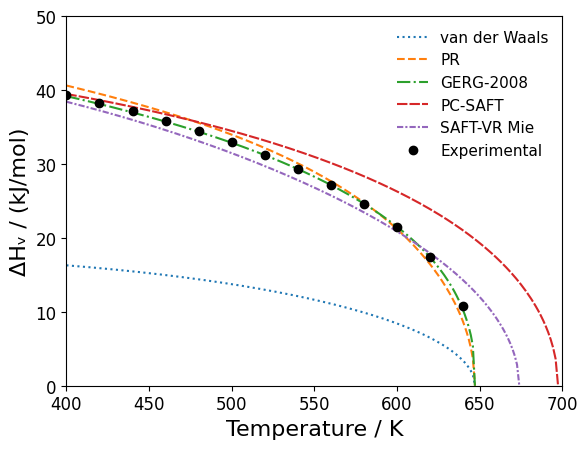

In [9]:
plt.clf()
plt.plot(T[:,2],Hvap[:,2]./1e3,label="van der Waals",linestyle=":")
plt.plot(T[:,3],Hvap[:,3]./1e3,label="PR",linestyle="--")
plt.plot(T[:,1],Hvap[:,1]./1e3,label="GERG-2008",linestyle="-.")
plt.plot(T[:,4],Hvap[:,4]./1e3,label="PC-SAFT",linestyle=(0, (5, 1)))
plt.plot(T[:,5],Hvap[:,5]./1e3,label="SAFT-VR Mie",linestyle=(0, (3, 1, 1, 1)))
plt.plot(T_exp,H_exp,linestyle="",marker="o",color="k",label="Experimental") 

plt.legend(loc="upper right",frameon=false,fontsize=11) 

plt.xlabel("Temperature / K",fontsize=16)
plt.ylabel("ΔHᵥ / (kJ/mol)",fontsize=16)
plt.xlim([400,700])
plt.ylim([0,50])
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
display(plt.gcf())

As always, the SAFT-type equations over-estimate the critical point but generally obtain more-accurate predictions at low temperature. Unsurprisingly, GERG-2008 obtains the most-accurate predictions, although PR isn't too far off either.